# Spinning Top

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import plotly
# plotly.io.renderers.default = "notebook_connected"
# import plotly.graph_objects as go
from IPython.display import HTML

In [27]:
plotly.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Introduction
<img src="eulerangles.jfif" alt="Euler Angles" width="500"/>

Assume the top of the spinning top is pointed along $x_3$. The angular momentum vector in terms of Euler angles, $\theta$, $\phi$ and $\psi$ is:
$$\vec{\omega} = \begin{bmatrix} \dot{\phi}\sin(\theta)\sin(\psi) + \dot{\theta}\cos(\psi) \\ \dot{\phi}\sin(\theta)\cos(\psi) - \dot{\theta}\sin(\psi) \\ \dot{\phi}\cos(\theta) + \dot{\psi} \end{bmatrix} $$
So the kinetic energy is:
$$T = \frac{1}{2}\omega^{T}I\omega$$
With $V=mgh\cos(\theta)$, the Lagrangian becomes:
$$\mathcal{L} = T-V = \frac{1}{2}\omega^{T}I\omega-mgh\cos(\theta)$$
Let $L$(not the Lagrangian) be the length of the spinning top. Using $mL^2$ to turn $\mathcal{L}$ into a dimensionless quantity:
$$\frac{\mathcal{L}}{mL^2} = \frac{1}{2}\omega^{T}\bigg(\frac{I}{mL^2}\bigg)\omega-\bigg(\frac{g}{L}\bigg)\bigg(\frac{h}{L}\bigg)\cos(\theta)$$
Prime everything that is dimensionless:
$$\mathcal{L}' = \frac{1}{2}\omega^{T} I' \omega - g'h'\cos(\theta) $$
Below this point, primes will be omitted, but note that everything that is dealt within the code is dimensionless.

## Solve Lagranges Equation

Define all appropriate symbols and declare appropriate functions.

In [2]:
t, h, g = smp.symbols("t h g", real=True)
the, phi, psi = smp.symbols(r"\theta \phi \psi", cls=smp.Function)
the = the(t)
phi = phi(t)
psi = psi(t)
# Derivatives
the_d = smp.diff(the, t)
phi_d = smp.diff(phi, t)
psi_d = smp.diff(psi ,t)
# Second derivatives
the_dd = smp.diff(the_d, t)
phi_dd = smp.diff(phi_d, t)
psi_dd = smp.diff(psi_d, t)

Transformation matrix. This matrix $\textbf{R}$ takes a vector in the $x_1$, $x_2$, $x_3$ coordinate system and transforms it into a vector into the $x$, $y$, $z$ coordinate system. This is needed because the top of the spinning top is always at $(0, 0, 1)$ in the $x_1$, $x_2$, $x_3$ coordinate system, so rotation is applied to get the poisition in the $x$, $y$, $z$ coordinate system.

In [3]:
R3 = smp.Matrix([[smp.cos(psi), -smp.sin(psi), 0],
                 [smp.sin(psi), smp.cos(psi), 0],
                 [0, 0, 1]])

R2 = smp.Matrix([[1, 0, 0],
                 [0, smp.cos(the), -smp.sin(the)],
                 [0, smp.sin(the), smp.cos(the)]])

R1 = smp.Matrix([[smp.cos(phi), -smp.sin(phi), 0],
                 [smp.sin(phi), smp.cos(phi), 0],
                 [0, 0, 1]])

R = R1 * R2 * R3
R1

Matrix([
[cos(\phi(t)), -sin(\phi(t)), 0],
[sin(\phi(t)),  cos(\phi(t)), 0],
[           0,             0, 1]])

Get the position of the top of the spinning top as a function of time:

In [4]:
R @ smp.Matrix([0, 0, 1])

Matrix([
[ sin(\phi(t))*sin(\theta(t))],
[-sin(\theta(t))*cos(\phi(t))],
[              cos(\theta(t))]])

Define the angular momentum vector $\omega$ in terms of the euler angles $\theta$, $\phi$ and $\psi$. See:  http://galileoandeinstein.physics.virginia.edu/7010/CM_26_Euler_Angles.html

In [5]:
omega = smp.Matrix([phi_d * smp.sin(the) * smp.sin(psi) + the_d * smp.cos(psi),
                    phi_d * smp.sin(the) * smp.cos(psi) - the_d * smp.sin(psi),
                    phi_d * smp.cos(the) + psi_d])

omega

Matrix([
[ sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)],
[-sin(\psi(t))*Derivative(\theta(t), t) + sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t)],
[                             cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)]])

Define the moment of inertia tensor:

In [6]:
Ixx, Iyy, Izz, Ixy, Iyz, Ixz = smp.symbols("I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz}", real=True)
I = smp.Matrix([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])
I

Matrix([
[I_{xx}, I_{xy}, I_{xz}],
[I_{xy}, I_{yy}, I_{yz}],
[I_{xz}, I_{yz}, I_{zz}]])

Define the Lagrangian:

In [7]:
T = smp.Rational(1, 2) * omega.T.dot(I * omega).simplify()
V = g * h * smp.cos(the)
L = T - V
L

-g*h*cos(\theta(t)) - (sin(\psi(t))*Derivative(\theta(t), t) - sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t))*(I_{xy}*(sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)) - I_{yy}*(sin(\psi(t))*Derivative(\theta(t), t) - sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t)) + I_{yz}*(cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)))/2 + (cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t))*(I_{xz}*(sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)) - I_{yz}*(sin(\psi(t))*Derivative(\theta(t), t) - sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t)) + I_{zz}*(cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)))/2 + (sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t))*(I_{xx}*(sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)) - I_{xy}*(sin(\psi(t))*Derivative(\theta(t), t) - sin(\theta(t

Obtain Lagrange's Equations:
$$\frac{\partial\mathcal{L}}{\partial X} - \frac{d}{dt} \frac{\partial\mathcal{L}}{\partial\dot{X}} $$

for each $X \in \left\{\theta, \phi, \psi \right\}$

In [8]:
LE1 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE1 = LE1.simplify()
LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t)
LE2 = LE2.simplify()
LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t)
LE3 = LE3.simplify()

Use the three equations
$$\frac{\partial\mathcal{L}}{\partial X} - \frac{d}{dt} \frac{\partial\mathcal{L}}{\partial\dot{X}} = 0 $$
for each of $X \in \left\{\theta, \phi, \psi \right\}$ to solve for $\ddot{\theta}$, $\ddot{\phi}$ and $\ddot{\psi}$. This is possible because each of these equations is $\textbf{linear}$ in terms of the second derivatives.

In [9]:
sols = smp.solve([LE1, LE2, LE3], (the_dd, phi_dd, psi_dd), simplify=False, rational=False)

Three equations for second derivatives:
$$\ddot{\theta} = f_1(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi}) $$
$$\ddot{\phi} = f_2(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi}) $$
$$\ddot{\psi} = f_3(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi}) $$

but python can only work with first order ODEs. Defining $z_1 = \dot\theta$, $z_2 = \dot\phi$ and $z_3 = \dot\psi$, 6 first order ODEs are obtained:

* $\dot{\theta} = z_1$
* $\dot{z_1} = f_1(\theta, \phi, \psi, z_1, z_2, z_3)$
* $\dot{\phi} = z_2$
* $\dot{z_2} = f_2(\theta, \phi, \psi, z_1, z_2, z_3)$
* $\dot{\psi} = z_3$
* $\dot{z_3} = f_3(\theta, \phi, \psi, z_1, z_2, z_3)$

Converting the sympy $\textbf{symbolic}$ functions into typical python $\textbf{numerical}$ functions:

In [10]:
dz1dt_f = smp.lambdify((g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, the_d, phi_d, psi_d), sols[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dz2dt_f = smp.lambdify((g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, the_d, phi_d, psi_d), sols[phi_dd])
dphidt_f = smp.lambdify(phi_d, phi_d)

dz3dt_f = smp.lambdify((g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, the_d, phi_d, psi_d), sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d, psi_d)

Define the system of equations $S = (\theta, z_1, \phi, z_2, \psi, z_3)$ and $dS/dt = f(S,t)$

In [11]:
def dSdt(S, t):
    the, z1, phi, z2, psi, z3 = S
    return [
        dthedt_f(z1),
        dz1dt_f(g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, z1, z2, z3),
        dphidt_f(z2),
        dz2dt_f(g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, z1, z2, z3),
        dpsidt_f(z3),
        dz3dt_f(g, h, Ixx, Iyy, Izz, Ixy, Iyz, Ixz, the, phi, psi, z1, z2, z3),
    ]

## Obtain Information About Spinning Top

In [12]:
coords = np.loadtxt("spinning_top.txt", unpack=True, delimiter=",", dtype=int)
# Get the correct xyz axes
coords[[1, 2]] = coords[[2, 1]]
# Normalize coordinates
coords = coords/max(coords.ravel())
# Adjust position so z axis is in center
x_mean, y_mean, z_max = np.mean(coords[0]), np.mean(coords[1]), max(coords[2])
P0 = x_mean, y_mean, z_max
coords = coords.T - P0
coords = coords.T
# Make z positive
coords[2] = -coords[2]
x, y, z = coords

Define the mass $m_i$ of each voxel as a function of $x,y,z$. If $m_i = 1$ everywhere then all voxels weigh the same and the top is isotropic

In [13]:
# Mass Type 1
m = np.ones(len(z))
# Mass 2
# m = z**2 + np.exp(x)

Compute the momentum of inertia tensor.

In [14]:
N = coords.shape[1]
Ixx = sum(m * (coords[1]**2 + coords[2]**2)) / sum(m)
Iyy = sum(m * (coords[0]**2 + coords[2]**2)) / sum(m)
Izz = sum(m * (coords[0]**2 + coords[1]**2)) / sum(m)
Ixy = sum(m * coords[0] * coords[1]) / sum(m)
Iyz = sum(m * coords[1] * coords[2]) / sum(m)
Ixz = sum(m * coords[0] * coords[2]) / sum(m)
I = np.array([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])

Define appropriate quantities

* $g' = g/L $ and gravitational acceleration is $9.8$ $m/s^2$ and $L=5$ cm.
* $h$ is the location of the center of mass in the z direction.

In [15]:
g = 9.8 / 0.05
h = np.sum(m * coords[2]) / sum(m)

Give the mass its appropriate initial condition

* $\theta_0 = \pi/4$ (spinning top is slightly tipped)
* $\dot{\theta_0} = 0 $ (no tipping velocity)
* $\phi_0 = 0$ (this is arbitrary so just set equal to zero)
* $\dot{\phi_0} = 10$ (slight initial movement in this direction)
* $\psi_0 = 0$ (arbitrary)
* $\dot{\psi_0} = 120\pi$ (spinning top is spinning fast)

and then solve differential equation between $t = 0$ and $t = 2$ seconds.

In [16]:
t = np.linspace(0, 2, 10000)
# Initial condition 1
ans = odeint(dSdt, y0=[np.pi / 4, 0, 0, 10, 0, 2 * np.pi * 60], t=t)

Get solutions for euler angles and top of spinning top.

In [17]:
the_t = ans.T[0]
phi_t = ans.T[2]
psi_t = ans.T[4]
x_t = np.sin(phi_t) * np.sin(the_t)
y_t = -np.cos(phi_t) * np.sin(the_t)
z_t = np.cos(the_t)

Plot $\theta$ (tip of the spinning top) as function of time

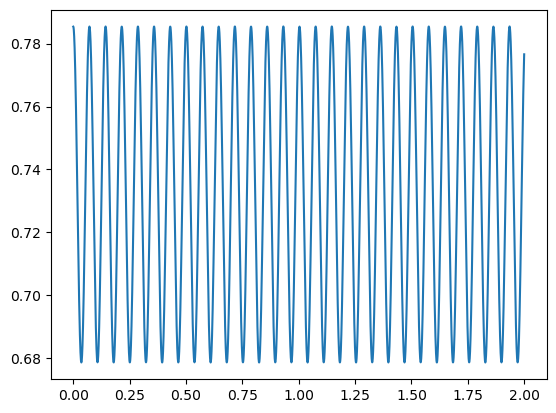

In [18]:
plt.plot(t, the_t)

Plot the location of the top of the spinning top as a function of time using an interactive 3D plotly plot.

In [19]:
i = 0
f = 10000

In [29]:
layout = plotly.graph_objects.Layout(title=r"Plot Title",
                   scene=dict(xaxis_title=r"x",
                              yaxis_title=r"y",
                              zaxis_title=r"z",
                              aspectratio=dict(x=1, y=1, z=1),
                              camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = plotly.graph_objects.Figure(layout=layout)
fig.add_scatter3d(x=[0], y=[0], z=[0])
fig.add_scatter3d(x=x_t[i:f], y=y_t[i:f], z=z_t[i:f], mode="lines",
                  line=dict(color="green", width=10))

fig.update_layout(
    scene=dict(xaxis = dict(range=[-1,1],),
               yaxis = dict(range=[-1,1],),
               zaxis = dict(range=[-1,1],),))

HTML(fig.to_html(default_width=1000, default_height=600))